In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import cartopy
import os
import pandas as pd
import cftime
import datetime as dt
import tqdm
import netCDF4 as nc

import os 
import glob

In [3]:
test_file = '/localdrive/drive6/erai/converts/invariants.nc'
ds = xr.open_dataset(test_file)
print(ds)
ds.close()
# print(ds.hgt)
# print(ds.lsm)


in_file = '/mnt/drive3/atmos.static.nc'
ds = xr.open_dataset(in_file)
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 240, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * latitude   (latitude) float32 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * time       (time) datetime64[ns] 1989-01-01T12:00:00
Data variables:
    hgt        (time, latitude, longitude) float32 ...
    lsm        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-29 00:44:48 GMT by grib_to_netcdf-2.15.0: grib_to_n...
<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, phalf: 33)
Coordinates:
  * phalf      (phalf) float64 1.0 4.0 8.186 13.79 ... 970.8 982.6 992.2 1e+03
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Dimensions without coordinates: bnds
Data variables:
    bk         (phalf) float32 ...
    pk         (phalf) float32 ...
    landsea 

In [4]:
ds = ds.rename({'oro': 'hgt', 'landsea': 'lsm'})

In [5]:
print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, phalf: 33)
Coordinates:
  * phalf      (phalf) float64 1.0 4.0 8.186 13.79 ... 970.8 982.6 992.2 1e+03
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Dimensions without coordinates: bnds
Data variables:
    bk         (phalf) float32 ...
    pk         (phalf) float32 ...
    lsm        (lat, lon) float32 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    hgt        (lat, lon) float32 ...
    land_mask  (lat, lon) float32 ...
Attributes:
    filename:          atmos.static.nc
    title:             c96L32_am4g9_fullaero_MDTF
    associated_files:  area: 19970101.grid_spec.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           fregrid --standard_dimension --input_mosaic C96_mosaic...
    code_version:      $Name: fre-nctools-bronx-10 $


In [6]:
lon = ds.lon.values
dlon = lon[1] - lon[0]
lon = np.round(lon - dlon/2., decimals=2)

lat = ds.lat.values
dlat = lat[1] - lat[0]
lat = np.round(lat - dlat/2., decimals=2)

In [7]:
ds['lon'] = lon
ds['lat'] = lat

In [8]:
print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, phalf: 33)
Coordinates:
  * phalf      (phalf) float64 1.0 4.0 8.186 13.79 ... 970.8 982.6 992.2 1e+03
  * lat        (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 86.0 87.0 88.0 89.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    bk         (phalf) float32 ...
    pk         (phalf) float32 ...
    lsm        (lat, lon) float32 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    hgt        (lat, lon) float32 ...
    land_mask  (lat, lon) float32 ...
Attributes:
    filename:          atmos.static.nc
    title:             c96L32_am4g9_fullaero_MDTF
    associated_files:  area: 19970101.grid_spec.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           fregrid --standard_dimension --input_mosaic C96_mosaic...
    code_version:      $Name: fre-nctools-bronx-10 $


In [9]:
# out_file = '/localdrive/drive10/jj/mdtf/inputdata/model/QBOi.EXP1.AMIP.001/topo.nc'
out_file = '/localdrive/drive10/jj/mdtf/inputdata/model/GFDL.EXP1.2PM.001/topo.nc'
ds.to_netcdf(out_file)

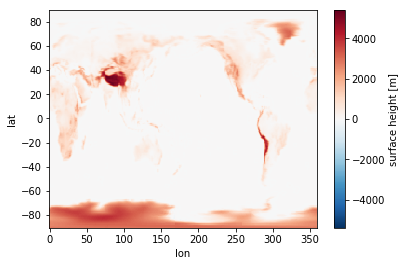

In [12]:
ds.hgt.plot()